In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gym_data.csv')

In [3]:
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,63.0,0
1,0,906,5,1,0,63.0,63.0,0
2,0,1207,5,1,0,63.0,63.0,0
3,0,1507,5,1,0,63.0,63.0,0
4,0,1808,5,1,0,63.0,63.0,0


In [4]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

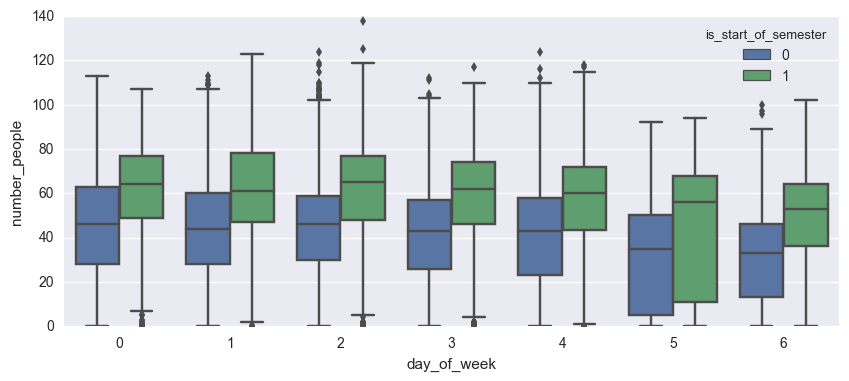

In [5]:
plt.figure(figsize=(10,4))
sns.boxplot('day_of_week','number_people',data=df,hue='is_start_of_semester')

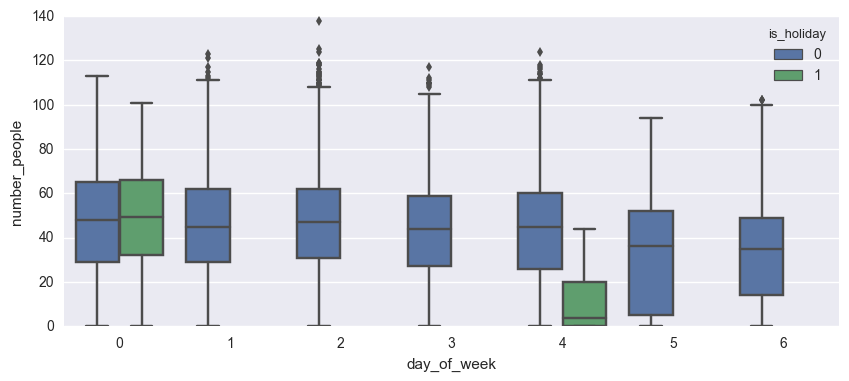

In [6]:
plt.figure(figsize=(10,4))
sns.boxplot('day_of_week','number_people',data=df,hue='is_holiday')

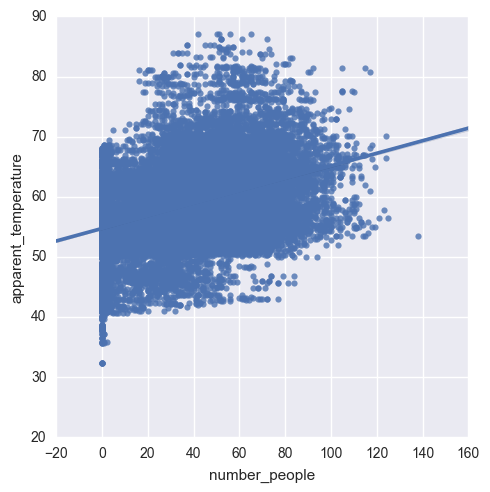

In [40]:
sns.lmplot('number_people','apparent_temperature',data=df)

In [56]:
days = pd.get_dummies(df['day_of_week'],drop_first=True)

In [58]:
days.columns = ['Tues','Weds','Thurs','Fri','Sat','Sun']

In [70]:
df = pd.concat([df,days],axis=1).drop('day_of_week',axis=1)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
df.isnull().values.any()

False

In [71]:
X = df.drop('number_people', axis=1)
y = df['number_people']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [80]:
X_train.head()

,timestamp,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester,Tues,Weds,Thurs,Fri,Sat,Sun
6794,1211,1,0,62.24,62.24,0,0,0,0,0,1,0
24064,28216,0,0,55.51,55.51,0,0,0,0,0,0,0
9307,76811,0,0,58.70,58.70,0,0,1,0,0,0,0
23412,49818,0,0,62.73,62.73,0,0,0,0,0,0,0
7357,64814,0,0,67.36,67.36,0,0,0,1,0,0,0


In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
predictions = lr.predict(X_test)

In [90]:
import numpy as np
from sklearn import metrics

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14.2807938125
MSE: 343.696404831
RMSE: 18.5390508072


In [92]:
lr.score(X_test,y_test)

0.43953384277049667